# Finding patterns in country data using PCA and K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans

# Read data

In [3]:
df = pd.read_csv('Country-data.csv')
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [4]:
dict = pd.read_csv('data-dictionary.csv')
pd.set_option('display.max_columns', None)  
dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Need to change values of columns from percentages to absolutes

In [5]:
# Change values from % to absolute
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [6]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No need to change data types

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values

In [10]:
df.duplicated().sum()

0

No duplicates values

In [11]:
df.describe().round()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
mean,38.0,7421.0,1057.0,6588.0,17145.0,8.0,71.0,3.0,12964.0
std,40.0,17974.0,1801.0,14711.0,19278.0,11.0,9.0,2.0,18329.0
min,3.0,1.0,13.0,1.0,609.0,-4.0,32.0,1.0,231.0
25%,8.0,447.0,79.0,640.0,3355.0,2.0,65.0,2.0,1330.0
50%,19.0,1777.0,322.0,2046.0,9960.0,5.0,73.0,2.0,4660.0
75%,62.0,7278.0,977.0,7720.0,22800.0,11.0,77.0,4.0,14050.0
max,208.0,183750.0,8664.0,149100.0,125000.0,104.0,83.0,7.0,105000.0


Need to scale data

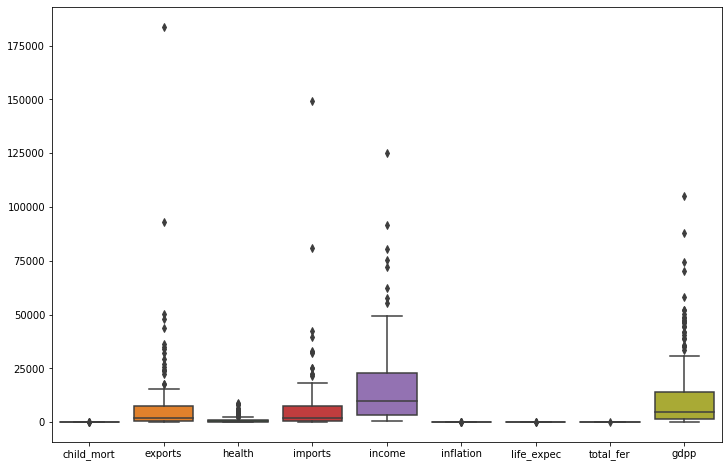

In [12]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df);

There are outliers for the exports, imports, income and gdpp columns. Will need Min Max Scaler

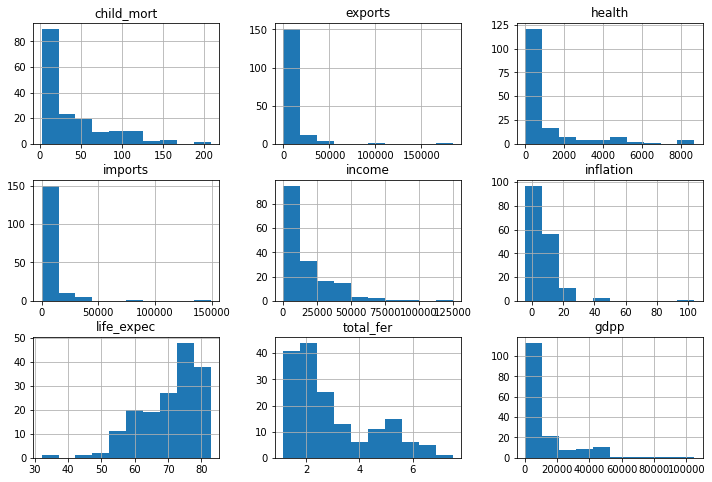

In [13]:
df.hist(figsize=(12,8));

Data needs to be normalised

In [14]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

Categories are tidy

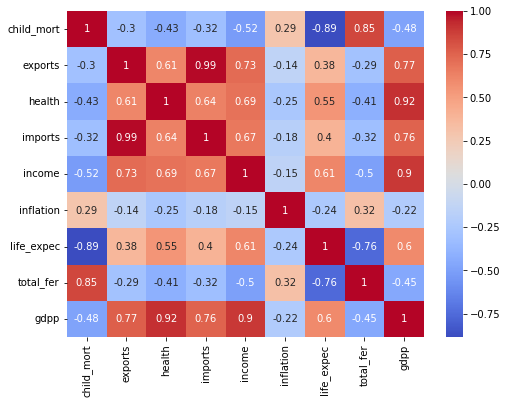

In [15]:
# Check for multi-colinearity
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm');

Imports and exports almost perfectly correlated; income and gdpp as well

# Scale and prepare data for PCA

In [16]:
# Drop non-numerical and redundant features
df1 = df.drop(columns=['country','imports'])
df1

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,4480,23.60,67.5,4.67,1310


In [17]:
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = pd.DataFrame(scaler.transform(df1),columns=df1.columns)

In [18]:
df_scaled.head(2)

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.003363,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.006227,0.029486,0.074933,0.080399,0.871795,0.078864,0.036833


# PCA

In [19]:
# Fit PCA model
pca = PCA()
X_proj = pca.fit_transform(df_scaled)

In [22]:
# DF of X projected in PCA space
X_proj = pd.DataFrame(X_proj,columns=[f'PC{i}' for i in range(1,9)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.580813,0.217077,-0.001280,-0.046192,-0.054438,0.025069,-0.065890,0.001628
1,0.103731,-0.269895,-0.024640,0.004070,0.003514,-0.003896,0.050684,0.001568
2,-0.018388,-0.147006,0.100330,-0.078066,0.030409,-0.007906,0.047666,0.008517
3,-0.621322,0.313491,0.096888,-0.054168,0.030748,-0.028140,0.053453,-0.001336
4,0.160906,-0.159981,0.009582,-0.026394,-0.055285,-0.009319,0.011721,-0.004409
...,...,...,...,...,...,...,...,...
162,-0.195896,-0.080802,-0.054591,-0.014023,-0.053270,0.069438,-0.110116,-0.013942
163,0.069653,-0.109219,0.230492,-0.052577,0.277531,0.033437,-0.009891,-0.033430
164,0.004320,-0.254487,-0.008755,0.006675,0.063147,0.027145,0.031991,-0.003631
165,-0.332336,0.040223,0.117209,-0.117908,0.055660,0.029230,-0.009347,0.002162


In [23]:
# View eigenvalues of PCA per feature
W = pca.components_
W = pd.DataFrame(W.T, 
                 index=df_scaled.columns, 
                 columns= [f'PC{i}' for i in range(1,9)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
child_mort,-0.422950,0.373733,-0.158710,0.353087,0.144058,-0.331860,0.632953,0.007969
exports,0.144448,0.217255,0.195652,0.268665,-0.197116,0.802950,0.331167,0.167989
health,0.401519,0.525415,-0.480853,-0.288240,0.325547,0.028608,-0.065473,0.370586
income,0.310525,0.261668,0.489331,0.370705,-0.235038,-0.429430,-0.208033,0.418696
inflation,-0.079934,0.032280,0.548898,-0.039825,0.822140,0.108089,-0.042867,-0.016053
life_expec,0.388670,-0.181243,0.277362,-0.521874,-0.104626,-0.206912,0.642588,0.011245
total_fer,-0.503033,0.496962,0.287119,-0.546853,-0.301505,0.054782,-0.155439,0.020811
gdpp,0.363468,0.433278,0.072189,0.098273,-0.037446,-0.049151,-0.056710,-0.811331


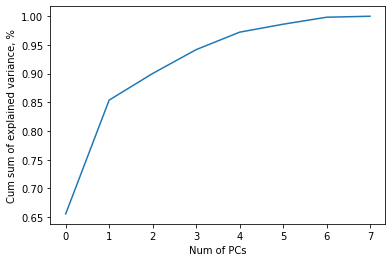

In [24]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Num of PCs')
plt.ylabel('Cum sum of explained variance, %');

In [25]:
print(f' The first 4 components (eigenvectors) explains {(pca.explained_variance_ratio_[:4].sum())*100} % of variance')

 The first 4 components (eigenvectors) explains 94.17806471276947 % of variance


In [29]:
total_var = pca.explained_variance_ratio_[:3].sum() * 100

fig = px.scatter_3d(
    X_proj, x='PC1', y='PC2', z='PC3',
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()

In [30]:
W.PC1.sort_values(ascending=False)

health        0.401519
life_expec    0.388670
gdpp          0.363468
income        0.310525
exports       0.144448
inflation    -0.079934
child_mort   -0.422950
total_fer    -0.503033
Name: PC1, dtype: float64

Health, life expect and gdpp are the most important features in PC1

In [31]:
W.PC2.sort_values(ascending=False)

health        0.525415
total_fer     0.496962
gdpp          0.433278
child_mort    0.373733
income        0.261668
exports       0.217255
inflation     0.032280
life_expec   -0.181243
Name: PC2, dtype: float64

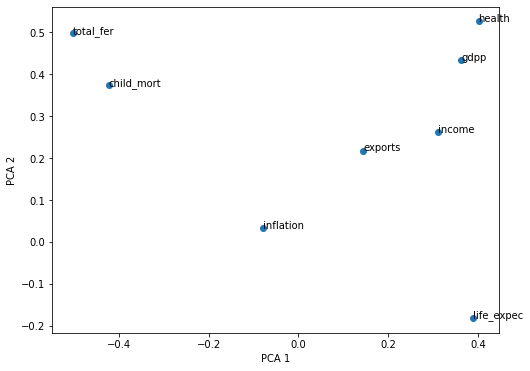

In [32]:
fig = plt.figure(figsize = (8,6))
plt.scatter(W.PC1, W.PC2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
for i, txt in enumerate(W.index):
    plt.annotate(txt, (W.PC1[i],W.PC2[i]))

PCA1 = Health, GDPP and life expectancy are highest;
PCA2 = Health, total fertility and GDPP are highest

# Dimensionalilty reduction, k=3

In [33]:
# Compress data into 3 dimensions
pca3 = PCA(n_components=3).fit(df_scaled)

# Project data into 3d
X_proj3 = pd.DataFrame(pca3.fit_transform(df_scaled), columns=['PC1','PC2','PC3'])

X_proj3


,PC1,PC2,PC3
0,-0.580813,0.217077,-0.001280
1,0.103731,-0.269895,-0.024640
2,-0.018388,-0.147006,0.100330
3,-0.621322,0.313491,0.096888
4,0.160906,-0.159981,0.009582
...,...,...,...
162,-0.195896,-0.080802,-0.054591
163,0.069653,-0.109219,0.230492
164,0.004320,-0.254487,-0.008755
165,-0.332336,0.040223,0.117209


In [34]:
# Check performance of reduced dimensions by reconstructing data
X_reconstructed = pca3.inverse_transform(X_proj3)
X_reconstructed.shape

(167, 8)

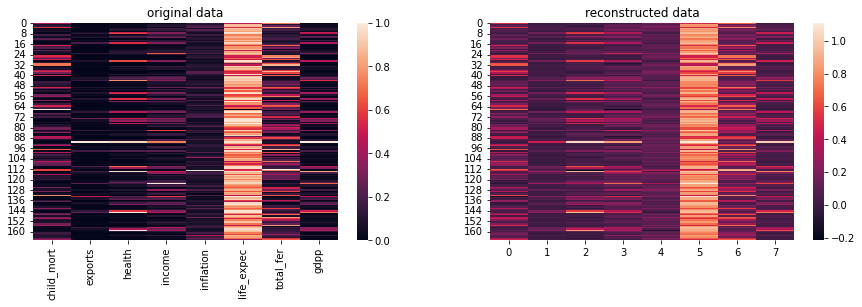

In [35]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(df_scaled)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

# KMeans

In [36]:
# Cluster DF using KMeans
km = KMeans(n_clusters=3)

# Use PCA projeted DF to optimise KMeans as works best on data that is already clustered
km.fit(X_proj)


KMeans(n_clusters=3)

In [37]:
km.cluster_centers_.shape

(3, 8)

There are 3 clusters with 8 PCs

In [38]:
km.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

Each row of data is assigned to three labels

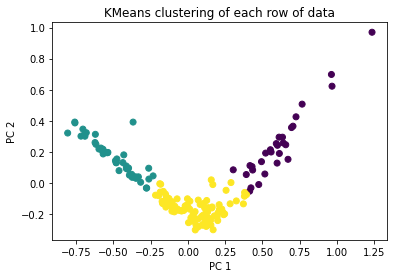

In [39]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering of each row of data'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [40]:
print(f' Inertia for 3 clusters is {km.inertia_}')

 Inertia for 3 clusters is 12.633151321129764


In [41]:
print(f' The number of iterations to converge: {km.n_iter_}')

 The number of iterations to converge: 5


## Optimise for best hyperparameter, n_clusters

 1 cluster(s): inertia score 40.40950324089544
 2 cluster(s): inertia score 22.83027306107436
 3 cluster(s): inertia score 12.633151321129764
 4 cluster(s): inertia score 10.668686007036166
 5 cluster(s): inertia score 9.082500426784769
 6 cluster(s): inertia score 7.938897727358196
 7 cluster(s): inertia score 7.058299451315244
 8 cluster(s): inertia score 6.303890196067107
 9 cluster(s): inertia score 5.54162534059574


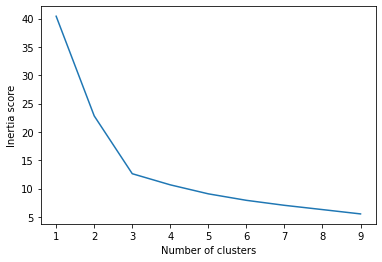

In [42]:
# Find optimal number of clusters such that loss function, inertia, is minimised
inertias=[]
ks=list(range(1,10))

for k in ks:
    kmtest = KMeans(n_clusters=k).fit(X_proj)
    print(f' {k} cluster(s): inertia score {kmtest.inertia_}')
    inertias.append(kmtest.inertia_)

plt.plot(ks,inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score');


Using elbow method, optimum number of clusters is 3

# Analyse clusters

In [43]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [45]:
pd.DataFrame(km.labels_)

,0
0,1
1,2
2,2
3,1
4,2
...,...
162,2
163,2
164,2
165,1


In [49]:
label_df = pd.DataFrame(km.labels_)